In [21]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Read and load csv file into a dataframe
train_df = pd.read_csv("Resources/train.csv")
test_df = pd.read_csv("Resources/test.csv")
train_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [23]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [24]:
# Find whether any null value exists in train_df and test_df
train_df.isna().sum()
test_df.isna().sum()

# Drop columns 'Unnamed: 0', and 'id'
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
test_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Drop na containing rows from train and test dataframes
train_df.dropna(inplace = True)
test_df.dropna(inplace = True)

In [25]:
# Remove white spaces in column names
train_df.columns = train_df.columns.str.replace(" ", "_")
test_df.columns = test_df.columns.str.replace(" ", "_")
train_df.to_csv('Resources/airline_passenger_satisfaction.csv', index=False)

In [26]:
# Drop Id column
train_df.drop(columns = 'id', inplace = True)

In [27]:
# Using label encoder for the preprocessing of data
from sklearn.preprocessing import LabelEncoder
X_train = train_df.apply(LabelEncoder().fit_transform)
X_test = test_df.apply(LabelEncoder().fit_transform)

In [28]:
# Find the correlation of features with the target feature 'satisfaction'
X_train.corr()[['satisfaction']]

,satisfaction
Gender,0.012356
Customer_Type,-0.187558
Age,0.137080
Type_of_Travel,-0.448995
Class,-0.449466
Flight_Distance,0.298903
Inflight_wifi_service,0.284163
Departure/Arrival_time_convenient,-0.051718
Ease_of_Online_booking,0.171507
Gate_location,0.000449


In [29]:
# Create y_train, y_test categorical data to numeric values
y_train = train_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
y_test = test_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Linear Regression Model

In [38]:
# Create the model by using LinearRegression.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data, and calculate the scores for the training and testing data.

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 1.0
Testing Score: 1.0


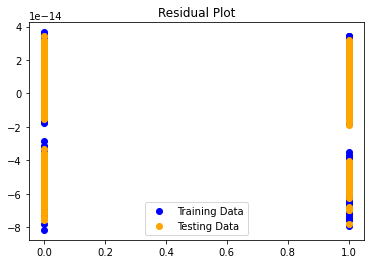

In [41]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Logistic Regression Model

In [14]:
# Import dependency
from sklearn.linear_model import LogisticRegression

# Fit the model 
lr = LogisticRegression(C=10, random_state = 322).fit(X_train, y_train)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Print Training and Test score
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.9597080912021931
Testing Data Score: 0.9585602286332213


# Random Forest Classification Model

In [20]:
# Import random forest model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
rfc = RandomForestClassifier(max_depth = 3, random_state = 322)

# Train the model
rfc.fit(X_train, y_train)

# Print the score
print(f"Training score : {rfc.score(X_train, y_train)}")
print(f"Testing score : {rfc.score(X_test, y_test)}")

Training score : 0.9985520396934185
Testing score : 0.997335187116209


# Applying standard scaler

In [21]:
# Scaling the data set
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# fit the scale
ss = StandardScaler().fit(X_train)

# Scaled model of Logistic Regression

In [22]:
# Train the Logistic Regression model on the scaled data and print the model score
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
lr.fit(X_train_scaled, y_train)
print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0
